In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Scope of the Project:
 - To predict the customers who are most likely to cancel their subscriptions using past 3 months of customer data which includes subscription and listening history

### Read the Data

In [171]:
customers = pd.read_csv('/Users/AnirbanGuha/Library/CloudStorage/OneDrive-Personal/Udemy Courses/Data Science - data Prep and EDA with Python/Data+Science+in+Python+-+Data+Prep+%26+EDA/Data/maven_music_customers.csv')

customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [172]:
listening_history = pd.read_excel(
    '/Users/AnirbanGuha/Library/CloudStorage/OneDrive-Personal/Udemy Courses/Data Science - data Prep and EDA with Python/Data+Science+in+Python+-+Data+Prep+%26+EDA/Data/maven_music_listening_history.xlsx',sheet_name='listening_history')

listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [220]:
audio = pd.read_excel(
    '/Users/AnirbanGuha/Library/CloudStorage/OneDrive-Personal/Udemy Courses/Data Science - data Prep and EDA with Python/Data+Science+in+Python+-+Data+Prep+%26+EDA/Data/maven_music_listening_history.xlsx',sheet_name='audio_files')

audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [174]:
sessions = pd.read_excel(
    '/Users/AnirbanGuha/Library/CloudStorage/OneDrive-Personal/Udemy Courses/Data Science - data Prep and EDA with Python/Data+Science+in+Python+-+Data+Prep+%26+EDA/Data/maven_music_listening_history.xlsx',sheet_name='session_login_time')
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


### Convert the data to correct data types to help in manipulation

In [175]:
customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [178]:
#Convert the date-like objects in customers dataframe to datetime objects and number like objects to numeric
customers['Member Since'] = pd.to_datetime(customers["Member Since"],format="%m/%d/%Y")
customers['Cancellation Date'] = pd.to_datetime(customers["Cancellation Date"])


In [179]:
customers["Subscription Rate"] = pd.to_numeric(customers["Subscription Rate"].str.replace('$',''))


### Clean the Data

In [180]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [181]:
#Replace all NaNs in Subscription Plan by Basic(Ads)
customers['Subscription Plan'] = customers['Subscription Plan'].fillna("Basic(Ads)")
customers['Subscription Plan'] = customers['Subscription Plan'].str.replace(" ","")

In [182]:
# For the Discount? column convert the Yes to 1 and NaN to 0
customers['Discount?'] = np.where(customers['Discount?']=='Yes',1,0)

In [183]:
# Change the subscription rates based on the Subscription Plan
mapping = {
    "Basic(Ads)": 2.99,
    "Premium(NoAds)": 7.99
}

customers['Subscription Rate'] = customers['Subscription Plan'].map(mapping)

In [184]:
# Change the Genre of audio df
audio.Genre.value_counts()

Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [185]:
audio.Genre = np.where(audio.Genre=="Pop Music", "Pop", audio.Genre)

### Finding duplicates

In [186]:
sessions.duplicated().sum()
## Conclusion: There is no duplicate to be fremoved

np.int64(0)

In [187]:
customers['Cancellation Date'].value_counts(dropna=False)

Cancellation Date
NaT           17
2023-06-01     6
2023-06-02     5
2023-06-03     2
Name: count, dtype: int64

In [188]:
customers["Cancelled"] = np.where(customers["Cancellation Date"].isnull(),1,0)

In [189]:
# Update the email column truncating the "Email:"
customers["Email"] = customers["Email"].str.replace("Email: ","")

### Exploratory Data Analysis
Objective: Analyze the customers who cancelled subscriptions
-  How long have they been members before cancelling
- What percentage of customers who cancelled had a discount

In [190]:
customers['Cancellation Date'] = customers['Cancellation Date'].mask(
    customers['Cancellation Date'] == pd.Timestamp('1970-01-01 00:00:00.000000001')
)

In [191]:
customers['Cancellation Date'].value_counts(dropna=False)

Cancellation Date
NaT           17
2023-06-01     6
2023-06-02     5
2023-06-03     2
Name: count, dtype: int64

In [192]:
customers['Membership Period'] = customers['Cancellation Date'] - customers['Member Since']

In [193]:
customers['Membership Period'].mean()

Timedelta('46 days 07:23:04.615384615')

In [199]:
#Calculate Cancellation Rate for those who have discount
discount_yes = customers[customers['Discount?']==1]
discount_yes

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Membership Period
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium(NoAds),7.99,1,NaT,1,NaT
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium(NoAds),7.99,1,2023-06-02,0,32 days
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium(NoAds),7.99,1,2023-06-02,0,32 days
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium(NoAds),7.99,1,2023-06-01,0,24 days
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium(NoAds),7.99,1,2023-06-01,0,24 days
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium(NoAds),7.99,1,2023-06-03,0,18 days
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium(NoAds),7.99,1,2023-06-01,0,16 days


In [204]:
discount_yes.Cancelled.sum()/discount_yes.Cancelled.count() * 100

np.float64(14.285714285714285)

In [205]:
discount_no = customers[customers['Discount?']==0]
discount_no

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Membership Period
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic(Ads),2.99,0,NaT,1,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic(Ads),2.99,0,NaT,1,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic(Ads),2.99,0,2023-06-01,0,80 days
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic(Ads),2.99,0,NaT,1,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic(Ads),2.99,0,NaT,1,NaT
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic(Ads),2.99,0,2023-06-03,0,75 days
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium(NoAds),7.99,0,NaT,1,NaT
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium(NoAds),7.99,0,2023-06-02,0,72 days
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium(NoAds),7.99,0,NaT,1,NaT
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic(Ads),2.99,0,NaT,1,NaT


In [206]:
discount_no.Cancelled.sum()/discount_no.Cancelled.count() * 100

np.float64(69.56521739130434)

In [224]:
#Understand customer listening history
# Join the audio table with listening_history
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [225]:
#Split the audio ID column
df = audio.ID.str.split('-',expand=True).rename(columns={0:'Audio Type',1:'Audio ID'})

In [231]:
audio = pd.concat([audio,df],axis=1).loc[:,['Audio ID','Name','Genre','Popularity','Audio Type']]

In [235]:
audio['Audio ID'] = pd.to_numeric(audio['Audio ID'])

In [236]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [242]:
#Join audio table with listening_history
listening_history_audio_joined = listening_history.merge(audio,on=['Audio ID','Audio Type'],how='left')

In [243]:
listening_history_audio_joined

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Name,Genre,Popularity
0,5001,100520,1,101,Song,Dance All Night,Pop,1.0
1,5001,100520,2,102,Song,Unbreakable Beat,Pop,2.0
2,5001,100520,3,103,Song,Sunset Boulevard,Pop Music,5.0
3,5001,100520,4,104,Song,Glowing Hearts,Pop Music,10.0
4,5001,100520,5,105,Song,Pop Rocks,Pop Music,52.0
...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Moonlit Serenade,Jazz,63.0
501,6588,111286,1,201,Podcast,Jokes on Jokes,Comedy,2.0
502,5763,111333,1,110,Song,Boss Moves,Hip Hop,28.0
503,5763,111333,2,108,Song,Chase the Dream,Hip Hop,4.0


In [244]:
#Find the number of listening sessions each customer has for past 3 months

In [257]:
customer_listening_sessions = listening_history_audio_joined.groupby('Customer ID').agg(session_count=('Session ID','nunique'))

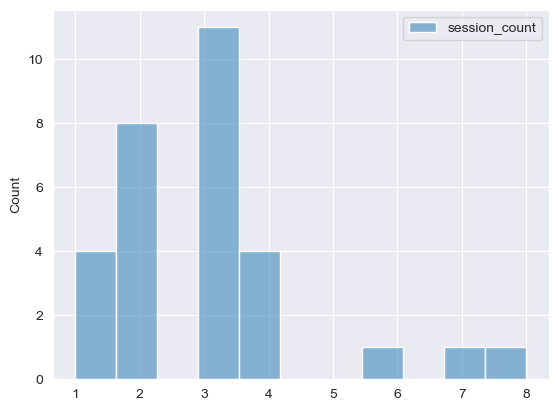

In [258]:
sns.histplot(customer_listening_sessions,color='black');

In [259]:
listening_history_audio_joined.Genre.value_counts()

Genre
Pop Music     165
Pop            94
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

### Prepare Data for modeling
-  Whether a customer cancelled or not
- Whether a customer received dicount or not
- The number of listening sessions
- Percent of listening history consisting of Pop
- Percent of listening history consisting of Poadcasts

In [326]:
# Create model dataframe
model_df = customers[['Customer ID','Cancelled','Discount?']]
model_df


,Customer ID,Cancelled,Discount?
0,5001,1,0
1,5002,1,0
2,5004,0,0
3,5267,1,0
4,5338,1,0
5,5404,0,0
6,5581,1,0
7,5759,0,0
8,5761,1,0
9,5763,1,0


In [327]:
customer_listening_sessions

,session_count
Customer ID,
5001,8
5002,4
5004,1
5267,7
5338,4
5404,1
5581,3
5759,2
5761,3


In [328]:
model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,1,0
1,5002,1,0
2,5004,0,0
3,5267,1,0
4,5338,1,0


In [329]:
#Join the model dataframe with the listening sessions to get the number of sessions for each customer
model_df = model_df.merge(customer_listening_sessions,on='Customer ID',how='left').rename(columns={'session_count':'Number of Sessions'})
model_df

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,1,0,8
1,5002,1,0,4
2,5004,0,0,1
3,5267,1,0,7
4,5338,1,0,4
5,5404,0,0,1
6,5581,1,0,3
7,5759,0,0,2
8,5761,1,0,3
9,5763,1,0,6


In [330]:
#Convert all the Pop Music to Pop
listening_history_audio_joined['Genre'] = np.where(listening_history_audio_joined['Genre']=='Pop Music','Pop',listening_history_audio_joined['Genre'])

In [331]:
#Convert the Genra column into numeric values
df = pd.get_dummies(listening_history_audio_joined['Genre'],dtype=int)

In [332]:
model_df = model_df.merge(
                pd.concat([listening_history_audio_joined['Customer ID'],df],axis=1),
                on='Customer ID',how='left'
                )

In [333]:
model_df

,Customer ID,Cancelled,Discount?,Number of Sessions,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,1,0,8,0,0,0,0,1,0
1,5001,1,0,8,0,0,0,0,1,0
2,5001,1,0,8,0,0,0,0,1,0
3,5001,1,0,8,0,0,0,0,1,0
4,5001,1,0,8,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
500,7581,0,1,2,0,0,0,0,1,0
501,7581,0,1,2,0,0,0,0,1,0
502,7581,0,1,2,0,0,0,0,0,1
503,7583,0,1,1,1,0,0,0,0,0


In [334]:
df = pd.get_dummies(listening_history_audio_joined['Audio Type'],dtype=int)

In [335]:
df

,Podcast,Song
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
500,0,1
501,1,0
502,0,1
503,0,1


In [336]:
model_df = model_df.merge(
                pd.concat([listening_history_audio_joined['Customer ID'],df],axis=1),
                on='Customer ID',how='left'
                )

In [337]:
model_df

,Customer ID,Cancelled,Discount?,Number of Sessions,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Podcast,Song
0,5001,1,0,8,0,0,0,0,1,0,0,1
1,5001,1,0,8,0,0,0,0,1,0,0,1
2,5001,1,0,8,0,0,0,0,1,0,0,1
3,5001,1,0,8,0,0,0,0,1,0,0,1
4,5001,1,0,8,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13130,7581,0,1,2,0,0,0,0,0,1,1,0
13131,7583,0,1,1,1,0,0,0,0,0,1,0
13132,7583,0,1,1,1,0,0,0,0,0,1,0
13133,7583,0,1,1,1,0,0,0,0,0,1,0


In [339]:
model_df.groupby('Customer ID').sum().reset_index()

,Customer ID,Cancelled,Discount?,Number of Sessions,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Podcast,Song
0,5001,3600,0,28800,0,0,1560,0,2040,0,0,3600
1,5002,484,0,1936,0,484,0,0,0,0,0,484
2,5004,0,0,81,0,0,0,0,81,0,0,81
3,5267,2025,0,14175,0,0,990,0,1035,0,0,2025
4,5338,324,0,1296,0,324,0,0,0,0,0,324
5,5404,0,0,64,0,0,0,0,64,0,0,64
6,5581,25,0,75,0,0,0,0,0,25,25,0
7,5759,0,0,450,0,0,0,0,225,0,0,225
8,5761,25,0,75,0,0,0,0,0,25,25,0
9,5763,961,0,5766,0,0,341,0,620,0,0,961


In [352]:
model_df['Percent of Pop'] = (round(model_df.Pop/
                  (model_df.Comedy
                   + model_df.Country
                   + model_df['Hip Hop']
                   + model_df['True Crime']
                   + model_df.Pop
                   ) * 100,2
                        )
                  )

In [354]:
model_df['Percent of Podcast'] = (round(model_df.Podcast/
                  (model_df.Podcast
                   + model_df.Song
                   ) * 100,2
                        )
                  )

In [356]:
model_df = model_df.loc[:,['Customer ID','Cancelled','Discount?','Number of Sessions','Percent of Pop','Percent of Podcast']]

In [357]:
model_df

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent of Pop,Percent of Podcast
0,5001,1,0,8,100.0,0.0
1,5001,1,0,8,100.0,0.0
2,5001,1,0,8,100.0,0.0
3,5001,1,0,8,100.0,0.0
4,5001,1,0,8,100.0,0.0
...,...,...,...,...,...,...
13130,7581,0,1,2,0.0,100.0
13131,7583,0,1,1,0.0,100.0
13132,7583,0,1,1,0.0,100.0
13133,7583,0,1,1,0.0,100.0


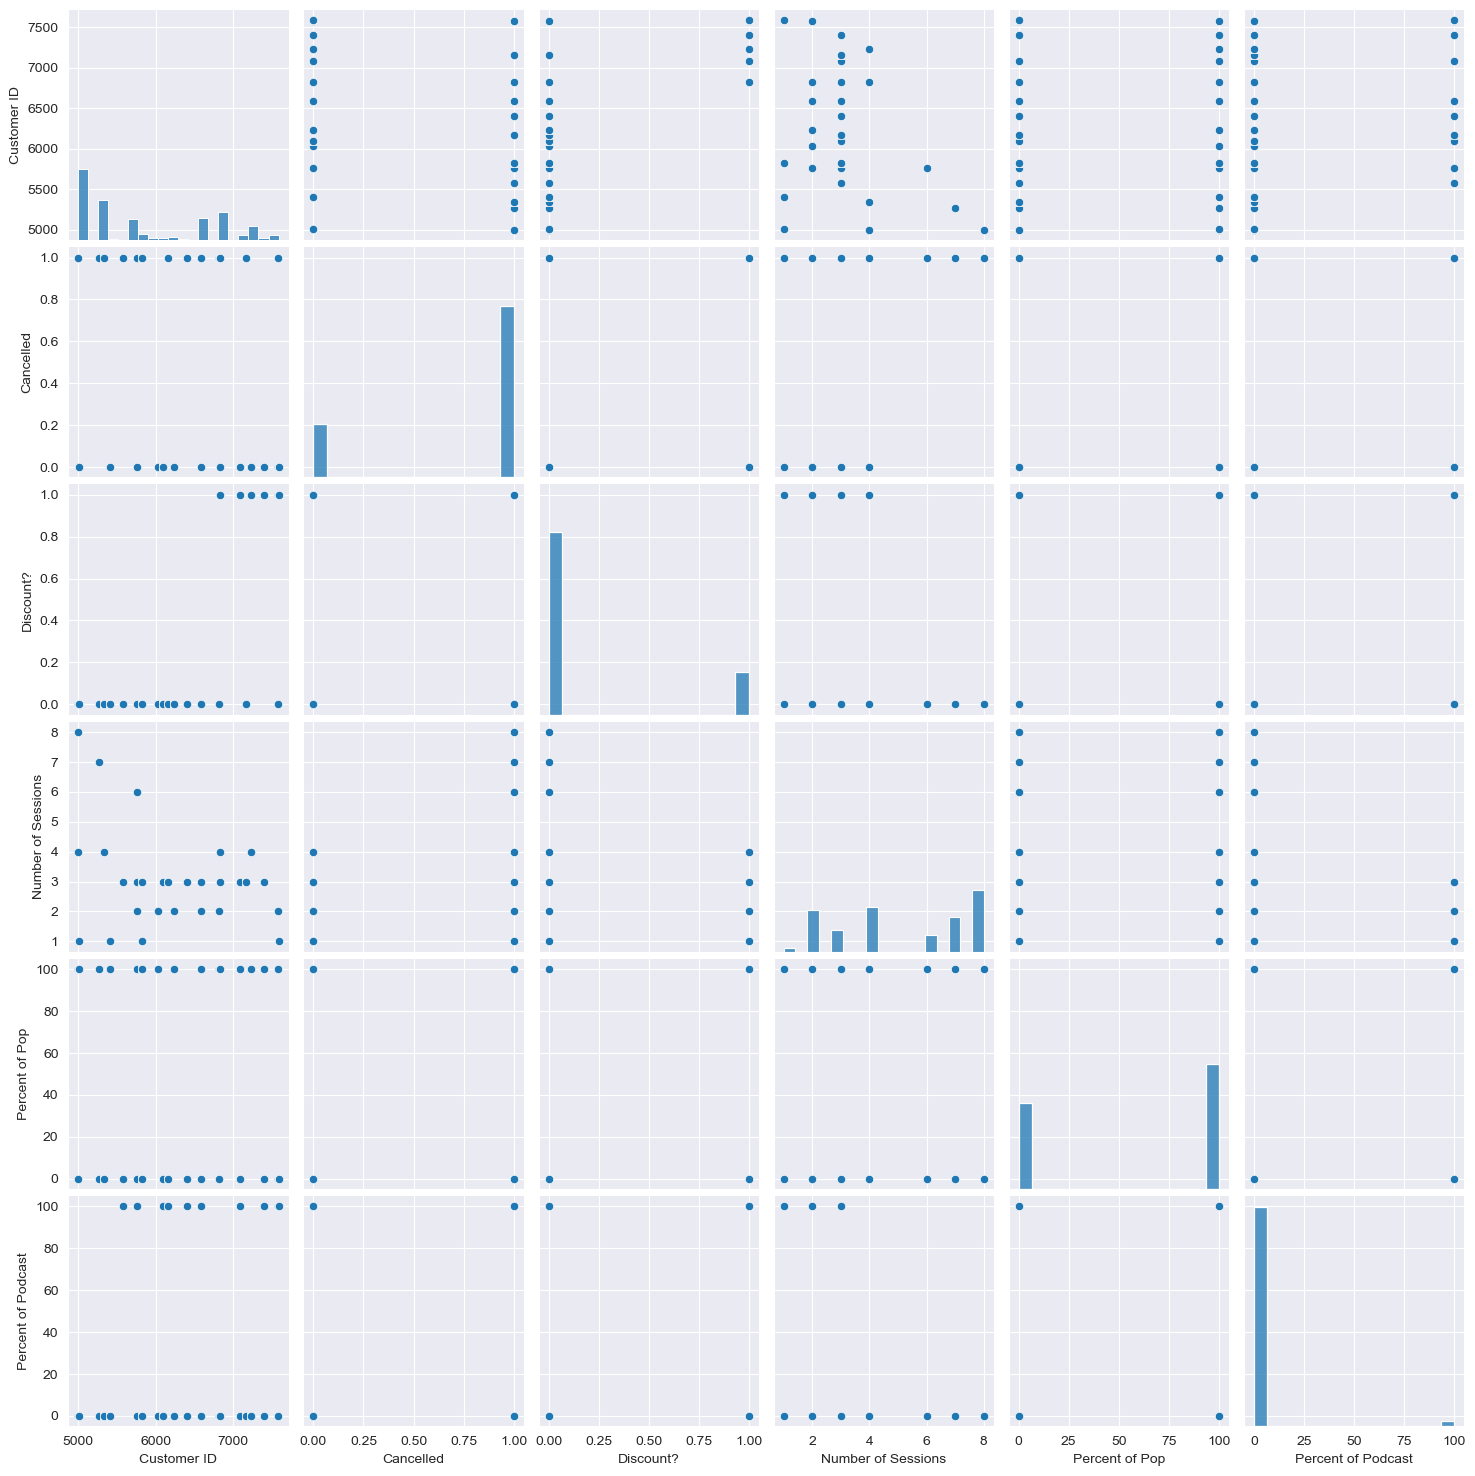

In [358]:
sns.pairplot(model_df)

In [359]:
model_df.corr()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent of Pop,Percent of Podcast
Customer ID,1.000000,-0.610421,0.698420,-0.768113,0.269623,0.121501
Cancelled,-0.610421,1.000000,-0.757788,0.456807,-0.369887,-0.141834
Discount?,0.698420,-0.757788,1.000000,-0.311958,0.325750,0.026536
Number of Sessions,-0.768113,0.456807,-0.311958,1.000000,-0.081381,-0.153011
Percent of Pop,0.269623,-0.369887,0.325750,-0.081381,1.000000,-0.126141
Percent of Podcast,0.121501,-0.141834,0.026536,-0.153011,-0.126141,1.000000
